In [1]:
import numpy as np
from scipy.integrate import quad
from numpy.random import default_rng
from numpy import exp

# Define the function to integrate
def integrand(x):
    return 2 * x * exp(-2 * x)

# Compute the integral using quad
integral_result, error = quad(integrand, 0, 1)
print('Integral result (quad method): %.3f' % integral_result)

# Monte Carlo simulation using the exponential distribution
num_samples = 10000
rng = default_rng()
samples = rng.exponential(scale=0.5, size=num_samples)

# Filter the samples to only include values less than 1
samples_below_1 = samples[samples < 1]

# Compute the probability of samples being less than 1
probability_less_than_1 = len(samples_below_1) / num_samples

# Estimate the integral using the mean of the filtered samples
monte_carlo_result = np.mean(samples_below_1) * probability_less_than_1
print('Integral result (Monte Carlo method): %.3f' % monte_carlo_result)


Integral result (quad method): 0.297
Integral result (Monte Carlo method): 0.298


Integral result (Inversion Sampling): 0.582
Integral result (Quad method): 0.583


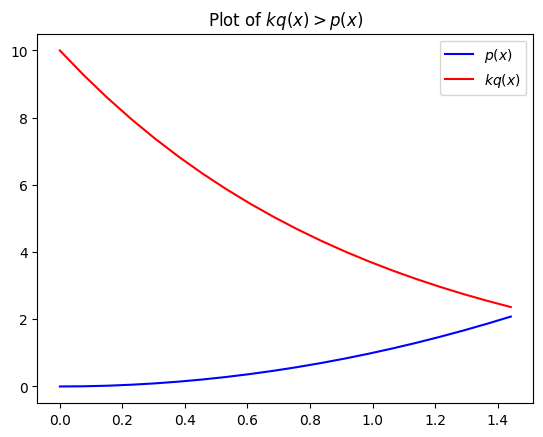

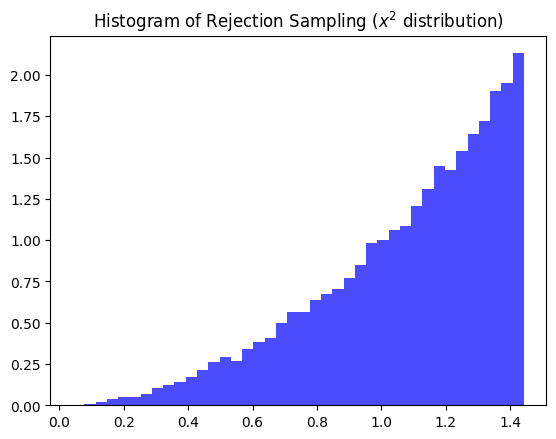

Integral result (Rejection Sampling): 0.579
Integral result (Importance Sampling): 0.580


In [2]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from numpy import mean, linspace
from numpy import exp as exp_func
from numpy.random import exponential, rand
import matplotlib.pyplot as plt

# Define the function to integrate
def function(x):
    return (x + 1) * x**2

# Calculate the integral using the quad method
integral_result, error = quad(function, 0, 1)
n_samples = 20000
uniform_random_values = rand(n_samples)

# Apply the transformation for inversion sampling
transformed_values = np.power(3 * uniform_random_values, 1/3)

# Calculate the probability ρ for the transformation
probability_less_than_1 = np.sum(transformed_values < 1) / len(transformed_values)
transformed_values = transformed_values[transformed_values < 1]

# Print the results for inversion sampling
print('Integral result (Inversion Sampling): %.3f' % (mean(transformed_values + 1) * probability_less_than_1))
print('Integral result (Quad method): %.3f' % integral_result)

# Define the probability density function p(x)
def probability_density(x):
    try:
        x[x < 0] = 0
        x[x > 1.44225] = 0
    except:
        if x < 0: return 0
        if x > 1.44225: return 0
    return x**2

# Set the scaling factor and define x values for plotting
scaling_factor = 10
x_vals = linspace(0, 1.44225, 20)
y1_vals = probability_density(x_vals)
y2_vals = scaling_factor * exp_func(-x_vals)

# Plot p(x) and scaled q(x)
plt.title('Plot of $kq(x) > p(x)$')
plt.plot(x_vals, y1_vals, color='blue', label='$p(x)$')
plt.plot(x_vals, y2_vals, color='red', label='$kq(x)$')
plt.legend()
plt.show()

# Rejection sampling
rejection_samples = []
while len(rejection_samples) < n_samples:
    u_value = exponential(scale=1, size=1).item()
    kq_value = scaling_factor * exp_func(-u_value)
    pu_value = probability_density(u_value)
    v_value = kq_value * rand()
    if v_value < pu_value:
        rejection_samples.append(u_value)

rejection_samples = np.array(rejection_samples)

# Plot histogram of the rejection sampled values
plt.hist(rejection_samples, bins=40, alpha=0.7, color='blue', density=True)
plt.title('Histogram of Rejection Sampling ($x^2$ distribution)')
plt.show()

# Calculate the probability ρ for rejection sampling
probability_less_than_1_rej = np.sum(rejection_samples < 1) / len(rejection_samples)
rejection_samples = rejection_samples[rejection_samples < 1]

# Print the results for rejection sampling
print('Integral result (Rejection Sampling): %.3f' % (mean(rejection_samples + 1) * probability_less_than_1_rej))

# Importance sampling
uniform_samples = rand(n_samples)
importance_sampling_result = mean((uniform_samples + 1) * uniform_samples**2)
print('Integral result (Importance Sampling): %.3f' % importance_sampling_result)
